**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

## import packages

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
plt.style.use('classic')
random.seed(42)

## import train and test data for Regression

In [3]:

R_train = pd.read_csv("https://raw.githubusercontent.com/Xintong1122/stats201-Prediction-Xintong/main/data/Processed_Data/Regression_Train.csv", index_col="Unnamed: 0")
R_test = pd.read_csv("https://raw.githubusercontent.com/Xintong1122/stats201-Prediction-Xintong/main/data/Processed_Data/Regression_Test.csv",index_col="Unnamed: 0")

## drop nan for Regression Data

In [4]:
R_train.isna().sum()

volume              0
volume_past_ma10    1
dtype: int64

In [5]:
R_train=R_train.dropna()

In [6]:
R_test.isna().sum()

volume              0
volume_past_ma10    0
dtype: int64

In [7]:
R_train.head()

,volume,volume_past_ma10
1,51607.71011,37151.16694
2,50451.02149,44379.43853
3,47528.84666,46403.29951
4,42856.18295,46684.68630
5,37157.17068,45918.98563


In [8]:
R_test.head()

,volume,volume_past_ma10
244,7444.189746,9297.899680
245,6805.868558,9064.278126
246,6781.525140,8883.842121
247,8161.302885,8482.016224
248,7482.808922,8511.305678


# Machine Learning Regression

## important global packages

In [10]:
from sklearn.metrics import r2_score

## Define the Train and Test (X, y)

In [11]:
R_train.head()

,volume,volume_past_ma10
1,51607.71011,37151.16694
2,50451.02149,44379.43853
3,47528.84666,46403.29951
4,42856.18295,46684.68630
5,37157.17068,45918.98563


In [12]:
X_train = pd.DataFrame(R_train['volume_past_ma10'])
y_train = pd.DataFrame(R_train['volume'])

In [13]:
R_test.head()

,volume,volume_past_ma10
244,7444.189746,9297.899680
245,6805.868558,9064.278126
246,6781.525140,8883.842121
247,8161.302885,8482.016224
248,7482.808922,8511.305678


In [14]:
X_test = pd.DataFrame(R_test['volume_past_ma10'])
y_test = pd.DataFrame(R_test['volume'])

## Linear Regression

In [15]:
from sklearn import linear_model

In [16]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [17]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -1.0142126741034114


In [18]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,10608.393464
1,10398.790582
2,10236.905235
3,9876.391128
4,9902.669329
...,...
116,8715.037731
117,8872.294916
118,9244.054352
119,9512.434927


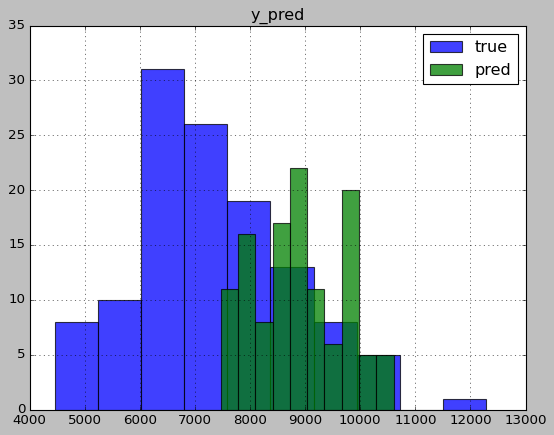

In [19]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Random Forest Regression

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-21-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [22]:
# calculate R2
from sklearn.metrics import r2_score

In [23]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -4.355387235099332


In [24]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,8001.807162
1,11676.416472
2,9337.079171
3,10397.282592
4,10397.282592
...,...
116,10397.282592
117,10397.282592
118,10397.282592
119,10397.282592


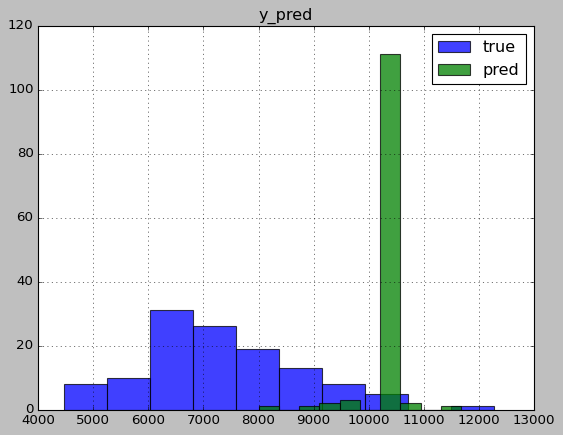

In [25]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()
